Some more information on the tarfile library can be found here:
https://docs.python.org/3/library/tarfile.html

Information on using pyarrow to manipulate parquet files
https://arrow.apache.org/docs/python/parquet.html#reading-parquet-and-memory-mapping

Information on reading parquet files with pandas
https://pandas.pydata.org/docs/reference/api/pandas.read_parquet.html

In [1]:
import tarfile
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

pd.set_option('display.max_columns', None)

In [2]:
#Load tar.gz file into Python

tar = tarfile.open("hitdata7days_0.tar.gz","r:gz")

In [3]:
#Extract all parquet files into computer memory

#tar.extractall()

In [4]:
tar = tarfile.open("hitdata7days_0.tar.gz","r:gz")

In [5]:
#tar.next() example. But be careful to reinstantiate tar when needed

tar.next()

<TarInfo 'hitdata7days/visitday=10' at 0x7fe68c529ac0>

In [6]:
#Extracting filename from TarInfo object

tn = tar.next()
tn.name

'hitdata7days/visitday=10/0017_part_00.parquet'

In [7]:
#Check if TarInfo is a file or a directory

print(tn.isreg())
print(tn.isdir())

True
False


In [8]:
#Reading info from parquet file

pq.read_schema(tn.name)

hitdatahistorymkey: int64
filename: string
linenumber: int32
brandcode: string
visitoridhigh: decimal128(20, 0)
visitoridlow: decimal128(20, 0)
visitnumber: decimal128(10, 0)
visitdatetime: timestamp[ns]
visitdate: date32[day]
visitmonth: int32
fiscalyear: int16
fiscalmonthnumber: int16
fiscalweeknumber: int16
hit_time_gmt: decimal128(11, 0)
service: string
acceptlanguage: string
eventlist: string
homepage: string
ip: string
pageevent: decimal128(3, 0)
pageeventvar1: string
pageeventvar2: string
pagetype: string
pageurl: string
pagename: string
productlist: string
userserver: string
channel: string
sitesection: string
category: string
subcategory: string
subcategory2: string
pagecategory: string
searchterms: string
searchresults: string
refinementtype: string
refinementattribute: string
myaccountengagement: string
formanalysis: string
emailsubscriptionadd: string
emailsubscriptionremove: string
linklocation: string
navigationlinks: string
searchtype: string
businessunit: string
categor

# Trying to work with Hourly/monthly etc visitors
Variables:
+ newvisit
+ dailyvisitor
+ hourlyvisitor
+ monthlyvisitor
+ yearlyvisitor

In [9]:
columns = ['evar23','newvisit', 'dailyvisitor', 'hourlyvisitor', 'monthlyvisitor', 'yearlyvisitor', 'eventlist']
dfs = []
for member in tar:
    if member.isreg():
        df_temp = pd.read_parquet(member.name,columns = columns)
        dfs.append(df_temp)

df_visitor_time_all = pd.concat(dfs)

In [10]:
df_visitor_time_all['eventlist'] = df_visitor_time_all['eventlist'].map(str)


In [11]:
len(df_visitor_time_all)

6458609

In [26]:
type_visitor_count = (df_visitor_time_all.iloc[:, [1,2,3,4]]).sum()

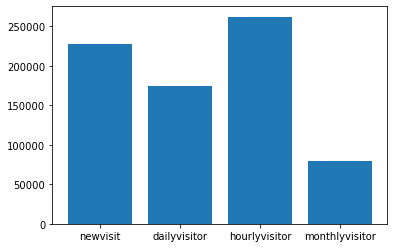

In [27]:
p = plt.bar(type_visitor_count.index, type_visitor_count.values)

In [20]:
checked_out_df = df_visitor_time_all.loc[df_visitor_time_all['eventlist'].str.contains('20456')]
#event code for checking out (even if it didn't go through)

In [22]:
checked_out_df.iloc[:, [1,2,3,4]].head()

,newvisit,dailyvisitor,hourlyvisitor,monthlyvisitor
10,0,0,0,0
365,0,0,0,0
447,0,0,0,0
701,0,0,0,0
1294,0,0,1,0


In [23]:
checkout_type_visitor_count = (checked_out_df.iloc[:, [1,2,3,4]]).sum()

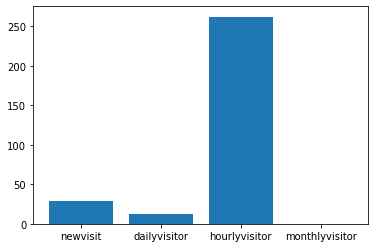

In [24]:
p_checkout = plt.bar(checkout_type_visitor_count.index, checkout_type_visitor_count.values)